In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


In [ ]:
# Load the dataset to get an overview of its structure
file_path = './reddit_post_with_comments_only-2.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure and content
df.head()

,post_comment,subreddit,sentiment
0,Its never to late to swtich professions if you...,mentalhealth,positive
1,I've been in my current tech management role f...,mentalhealth,positive
2,Choose a specialty with a relaxed/easier train...,mentalhealth,positive
3,I changed careers twice. First one was simply ...,mentalhealth,positive
4,"This sounds like me, except veterinary! I don'...",mentalhealth,negative


In [ ]:
# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

# Cleaning the text in the review column
df['cleaned_post_comment'] = df['post_comment'].apply(clean)
df.head()



,post_comment,subreddit,sentiment,cleaned_post_comment
0,Its never to late to swtich professions if you...,mentalhealth,positive,Its never to late to swtich professions if you...
1,I've been in my current tech management role f...,mentalhealth,positive,I ve been in my current tech management role f...
2,Choose a specialty with a relaxed/easier train...,mentalhealth,positive,Choose a specialty with a relaxed easier train...
3,I changed careers twice. First one was simply ...,mentalhealth,positive,I changed careers twice First one was simply s...
4,"This sounds like me, except veterinary! I don'...",mentalhealth,negative,This sounds like me except veterinary I don t ...


In [ ]:
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}





def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

df['POS_tagged_comment'] = df['cleaned_post_comment'].apply(token_stop_pos)
df.head()

,post_comment,subreddit,sentiment,cleaned_post_comment,POS_tagged_comment
0,Its never to late to swtich professions if you...,mentalhealth,positive,Its never to late to swtich professions if you...,"[(never, r), (late, v), (swtich, v), (professi..."
1,I've been in my current tech management role f...,mentalhealth,positive,I ve been in my current tech management role f...,"[(current, a), (tech, a), (management, n), (ro..."
2,Choose a specialty with a relaxed/easier train...,mentalhealth,positive,Choose a specialty with a relaxed easier train...,"[(Choose, v), (specialty, n), (relaxed, a), (e..."
3,I changed careers twice. First one was simply ...,mentalhealth,positive,I changed careers twice First one was simply s...,"[(changed, v), (careers, n), (twice, r), (Firs..."
4,"This sounds like me, except veterinary! I don'...",mentalhealth,negative,This sounds like me except veterinary I don t ...,"[(sounds, v), (like, None), (except, None), (v..."


In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma   # tokens with no POS tag are left unlemmatized
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['lemmatized_comment'] = df['POS_tagged_comment'].apply(lemmatize)
df.head()

,post_comment,subreddit,sentiment,cleaned_post_comment,POS_tagged_comment,lemmatized_comment
0,Its never to late to swtich professions if you...,mentalhealth,positive,Its never to late to swtich professions if you...,"[(never, r), (late, v), (swtich, v), (professi...",never late swtich profession really hate yea...
1,I've been in my current tech management role f...,mentalhealth,positive,I ve been in my current tech management role f...,"[(current, a), (tech, a), (management, n), (ro...",current tech management role year first time...
2,Choose a specialty with a relaxed/easier train...,mentalhealth,positive,Choose a specialty with a relaxed easier train...,"[(Choose, v), (specialty, n), (relaxed, a), (e...",Choose specialty relaxed easy training pract...
3,I changed careers twice. First one was simply ...,mentalhealth,positive,I changed careers twice First one was simply s...,"[(changed, v), (careers, n), (twice, r), (Firs...",change career twice First one simply stupid ...
4,"This sounds like me, except veterinary! I don'...",mentalhealth,negative,This sounds like me except veterinary I don t ...,"[(sounds, v), (like, None), (except, None), (v...",sound like except veterinary answer advice r...


In [ ]:
def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue
        # Take the first set, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
        if not tokens_count:
            return 0
        if sentiment>0:
            return "Positive"
        if sentiment==0:
            return "Neutral"
        else:
            return "Negative"

In [ ]:
df['SWN_sentiment_analysis'] = df['POS_tagged_comment'].apply(sentiwordnetanalysis)
df

,post_comment,subreddit,sentiment,cleaned_post_comment,POS_tagged_comment,lemmatized_comment,SWN_sentiment_analysis
0,Its never to late to swtich professions if you...,mentalhealth,positive,Its never to late to swtich professions if you...,"[(never, r), (late, v), (swtich, v), (professi...",never late swtich profession really hate yea...,Negative
1,I've been in my current tech management role f...,mentalhealth,positive,I ve been in my current tech management role f...,"[(current, a), (tech, a), (management, n), (ro...",current tech management role year first time...,Neutral
2,Choose a specialty with a relaxed/easier train...,mentalhealth,positive,Choose a specialty with a relaxed easier train...,"[(Choose, v), (specialty, n), (relaxed, a), (e...",Choose specialty relaxed easy training pract...,Neutral
3,I changed careers twice. First one was simply ...,mentalhealth,positive,I changed careers twice First one was simply s...,"[(changed, v), (careers, n), (twice, r), (Firs...",change career twice First one simply stupid ...,Neutral
4,"This sounds like me, except veterinary! I don'...",mentalhealth,negative,This sounds like me except veterinary I don t ...,"[(sounds, v), (like, None), (except, None), (v...",sound like except veterinary answer advice r...,Neutral
...,...,...,...,...,...,...,...
17150,I have a female protector spirit voice on the ...,schizophrenia,positive,I have a female protector spirit voice on the ...,"[(female, a), (protector, n), (spirit, a), (vo...",female protector spirit voice right side bra...,Neutral
17151,happy sunday!!,schizophrenia,positive,happy sunday,"[(happy, a), (sunday, n)]",happy sunday,Positive
17152,Great pic and thanks for the kind message. Kee...,schizophrenia,positive,Great pic and thanks for the kind message Keep...,"[(Great, n), (pic, n), (thanks, n), (kind, n),...",Great pic thanks kind message Keep rock friend,Neutral
17153,I've been listening to this with my morning co...,schizophrenia,positive,I ve been listening to this with my morning co...,"[(listening, v), (morning, n), (coffee, n), (a...",listen morning coffee absolutely haunt stuff...,Neutral


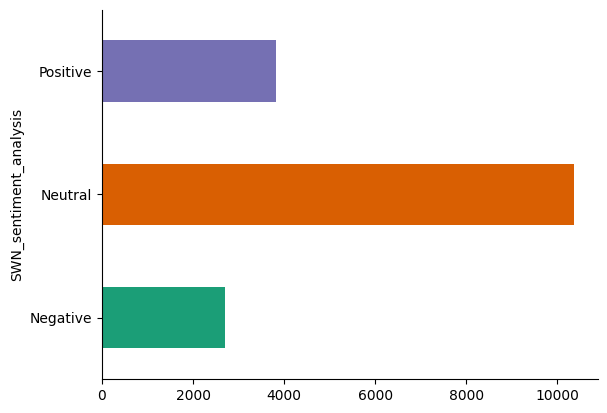

In [ ]:
# SWN_sentiment_analysis
df.groupby('SWN_sentiment_analysis').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from google.colab import files
columns_to_export = ['post_comment', 'subreddit','sentiment','lemmatized_comment', 'SWN_sentiment_analysis' ]
df.to_csv('classified_comments.csv',columns= columns_to_export, index=False)
files.download('classified_comments.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_eval = pd.read_csv('evaluation_dataset.csv')
df_eval.head()

# Cleaning the text in the review column
df_eval['cleaned_post_comment'] = df_eval['post_comment'].apply(clean)

df_eval['POS_tagged_comment'] = df_eval['cleaned_post_comment'].apply(token_stop_pos)
df_eval.head()

df_eval['lemmatized_comment'] = df_eval['POS_tagged_comment'].apply(lemmatize)
df_eval.head()

df_eval['SWN_sentiment_analysis'] = df_eval['POS_tagged_comment'].apply(sentiwordnetanalysis)
df_eval.head()

df_eval['SWN_sentiment_analysis'] = df_eval['SWN_sentiment_analysis'].str.lower()






In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

na_count = df_eval['sentiment'].isna().sum()
na_count2 = df_eval['SWN_sentiment_analysis'].isna().sum()
print(na_count2)
df_eval['SWN_sentiment_analysis'] = df_eval['SWN_sentiment_analysis'].fillna('neutral')
y_true = df_eval['sentiment']
y_pred = df_eval['SWN_sentiment_analysis']




19


In [ ]:
print(y_true)
print(y_pred)
df_eval.head()

0       negative
1       positive
2        neutral
3       positive
4       negative
          ...   
1579    negative
1580    negative
1581    negative
1582    positive
1583    positive
Name: sentiment, Length: 1584, dtype: object
0       negative
1        neutral
2       positive
3       positive
4       negative
          ...   
1579     neutral
1580    negative
1581     neutral
1582     neutral
1583     neutral
Name: SWN_sentiment_analysis, Length: 1584, dtype: object


,post_comment,subreddit,sentiment,post_comment_processed,senticnet_subjectivity,cleaned_post_comment,POS_tagged_comment,lemmatized_comment,SWN_sentiment_analysis
0,I feel the same way unfortunately we are the u...,schizophrenia,negative,feel way unfortunately unfortunate one hardest...,SUBJECTIVE,I feel the same way unfortunately we are the u...,"[(feel, v), (way, n), (unfortunately, None), (...",feel way unfortunately unfortunate one hard ...,negative
1,Live by your own standards and terms. Not ever...,mentalhealth,positive,live standard term everyone outward social yet...,SUBJECTIVE,Live by your own standards and terms Not every...,"[(Live, a), (standards, n), (terms, n), (every...",Live standard term everyone outward social y...,neutral
2,Just marry him it's easier 😂,socialanxiety,neutral,marry easier,SUBJECTIVE,Just marry him it s easier,"[(marry, n), (easier, a)]",marry easy,positive
3,"Once, I got depressed. I had no energy. I had ...",depression,positive,got depressed energy wish see talk anyone thou...,SUBJECTIVE,Once I got depressed I had no energy I had no ...,"[(got, v), (depressed, a), (energy, n), (wish,...",get depressed energy wish see talk anyone th...,positive
4,I wish I'd looked after my teeth earlier. Had ...,depression,negative,wish id looked teeth earlier plenty filling cr...,SUBJECTIVE,I wish I d looked after my teeth earlier Had p...,"[(wish, v), (looked, v), (teeth, n), (earlier,...",wish look teeth earlier plenty filling crown...,negative


In [ ]:
f1_positive = f1_score(y_true, y_pred, labels=['positive'], average='weighted')
f1_negative = f1_score(y_true, y_pred, labels=['negative'], average='weighted')
f1_neutral = f1_score(y_true, y_pred, labels=['neutral'], average='weighted')

# Print F1 Scores
print("F1 Score (Positive):", f1_positive)
print("F1 Score (Negative):", f1_negative)
print("F1 Score (Neutral):", f1_neutral)

# Calculate overall F1 Score
f1_overall = f1_score(y_true, y_pred, average='weighted')
print("Overall F1 Score:", f1_overall)





F1 Score (Positive): 0.36891679748822603
F1 Score (Negative): 0.25577812018489987
F1 Score (Neutral): 0.27630522088353415
Overall F1 Score: 0.3248529973148345


In [ ]:
from sklearn.metrics import precision_score, recall_score

precision_pos = precision_score(y_true, y_pred, labels=['positive'], average='weighted', zero_division=0)
precision_neg = precision_score(y_true, y_pred, labels=['negative'], average='weighted', zero_division=0)
precision_neutral = precision_score(y_true, y_pred, labels=['neutral'], average='weighted', zero_division=0)

# Print F1 Scores
print("Precision Score (Positive):", precision_pos)
print("Precision Score (Negative):", precision_neg)
print("Precision Score (Neutral):", precision_neutral)

average_precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
print("Average Precision:", average_precision)




Precision Score (Positive): 0.6657223796033994
Precision Score (Negative): 0.3458333333333333
Precision Score (Neutral): 0.17356205852674067
Average Precision: 0.5042051185693537


In [ ]:
# Generate the classification report as a dictionary
report = classification_report(y_true,y_pred, output_dict=True)


# Print precision, recall, and F1 scores for each class along with averages
print("Metrics for each class:")
for label, metrics in report.items():
    if label in ["accuracy"]:  # Skip the accuracy since it doesn't have precision/recall/F1
        continue
    print(f"Class {label.capitalize()}:")
    print(f" Precision: {metrics['precision']:.2f}")
    print(f" Recall: {metrics['recall']:.2f}")
    print(f" F1 Score: {metrics['f1-score']:.2f}")
    print()  # Blank line for better readability

# Print overall averages
print("Overall averages:")
print(f" Macro Average Precision: {report['macro avg']['precision']:.2f}")
print(f" Macro Average Recall: {report['macro avg']['recall']:.2f}")
print(f" Macro Average F1 Score: {report['macro avg']['f1-score']:.2f}")
print(f" Weighted Average Precision: {report['weighted avg']['precision']:.2f}")
print(f" Weighted Average Recall: {report['weighted avg']['recall']:.2f}")
print(f" Weighted Average F1 Score: {report['weighted avg']['f1-score']:.2f}")

Metrics for each class:
Class Negative:
 Precision: 0.35
 Recall: 0.20
 F1 Score: 0.26

Class Neutral:
 Precision: 0.17
 Recall: 0.68
 F1 Score: 0.28

Class Positive:
 Precision: 0.67
 Recall: 0.26
 F1 Score: 0.37

Class Macro avg:
 Precision: 0.40
 Recall: 0.38
 F1 Score: 0.30

Class Weighted avg:
 Precision: 0.50
 Recall: 0.31
 F1 Score: 0.32

Overall averages:
 Macro Average Precision: 0.40
 Macro Average Recall: 0.38
 Macro Average F1 Score: 0.30
 Weighted Average Precision: 0.50
 Weighted Average Recall: 0.31
 Weighted Average F1 Score: 0.32
